#**Logistic Regression**
We implemented logistic regression via gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from numpy import ndarray

In [2]:
NUM_ITER = 1000
SHUFFLE_ITER = 100

## read data and normalize it

In [3]:
def read_data(base_path):
    data = pd.read_csv(base_path, header=None).values
    normalize_data = np.hstack((normalize_points(data[:, :-1]), np.reshape(data[:, -1], (data.shape[0], 1))))
    return normalize_data

## shuffle data and split it to train data and test data

In [4]:
def split_data(normalize_data):
    indices = np.random.permutation(normalize_data.shape[0])
    shuffle_data = normalize_data[indices]
    len_train_data = int(0.9 * shuffle_data.shape[0])
    train_data = shuffle_data[:len_train_data, :]
    test_data = shuffle_data[len_train_data:, :]
    return train_data, test_data

## normalize given points

In [5]:
def normalize_points(points):
    min_values = points.min(axis=0)
    max_values = points.max(axis=0)
    scaled_points = (points - min_values) / (max_values - min_values)
    return scaled_points

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## the logistic regression function, return the w (the line)

In [7]:
def Logistic_regression_via_GD(P: ndarray, y: ndarray, lr: float):
    w = np.zeros((P.shape[0] + 1, 1))
    m = P.shape[1]
    P = np.vstack((P, np.ones((1, m))))
    for _ in range(NUM_ITER):
        z = np.dot(w.T, P)
        a = sigmoid(z)
        dz = a - y
        dw = np.dot(P, dz.T)
        w -= lr * dw

    return w

## predict labels of points given w, b (the line)

In [8]:
def Predict(w, b, p):
    z = np.dot(w.T, p) + b
    return np.round(sigmoid(z))

## Plot

In [9]:
def plot(data, labels, w):
    fig, ax = plt.subplots()

    c0 = data[labels == 0]
    c1 = data[labels == 1]

    ax.scatter(c0[:, 0], c0[:, 1], c='red')
    ax.scatter(c1[:, 0], c1[:, 1], c='blue')

    a, b, c = w
    m = -a / b
    b = -c / b

    x = np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 0.1)
    y = m * x + b
    plt.plot(x, y)

    plt.show()

Avg test accuracy: 88.5%


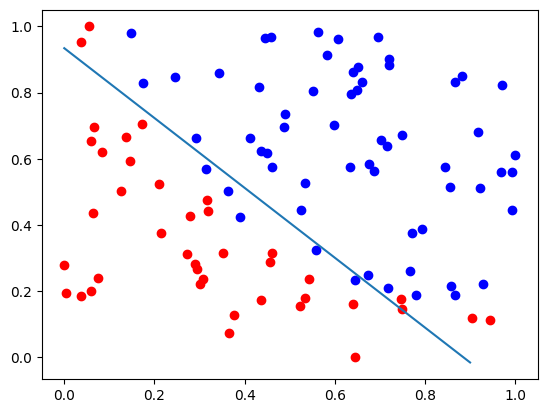

In [11]:
path = os.path.abspath('exams.csv')
average_accuracy = 0
data = read_data(path)
best_w = np.zeros((data.shape[1], 1))
best_accuracy = 0
for _ in range(SHUFFLE_ITER):
  train_arr, test_arr = split_data(data)

  train_points = train_arr[:, :-1].T
  train_labels = train_arr[:, -1].T
  train_len = train_arr.shape[0]

  w = Logistic_regression_via_GD(train_points, train_labels, lr=0.01)

  test_points = test_arr[:, :-1].T
  test_labels = test_arr[:, -1].T
  test_len = test_arr.shape[0]

  test_prediction = Predict(w[:-1], w[-1], test_points)
  test_accuracy = np.mean(test_prediction == test_labels)
  average_accuracy += test_accuracy

  if test_accuracy > best_accuracy:
    best_w = w
    best_accuracy =test_accuracy

average_accuracy = average_accuracy / SHUFFLE_ITER
print(f'Avg test accuracy: {average_accuracy * 100}%')
plot(data[:,:-1], data[:, -1], best_w)